<a href="https://colab.research.google.com/github/suruchichoudhary122/EditQuasar/blob/main/handwriting%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Project: Handwriting Recognition Using Machine Learning (A–Z Letters) Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [2]:
data=pd.read_csv('/content/A_Z Handwritten Data.csv')

In [3]:
X = data.drop('0', axis=1).values
y = data['0'].values


In [4]:
X = X / 255.0

# Reshape to (28, 28, 1)
X = X.reshape(-1, 28, 28, 1)

In [5]:
y_cat = to_categorical(y, num_classes=26)

# Split into training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)


In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(26, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - accuracy: 0.8593 - loss: nan - val_accuracy: 0.7270 - val_loss: nan
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.7125 - loss: nan - val_accuracy: 0.7270 - val_loss: nan
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.7172 - loss: nan - val_accuracy: 0.7270 - val_loss: nan
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - accuracy: 0.7152 - loss: nan - val_accuracy: 0.7270 - val_loss: nan
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.7107 - loss: nan - val_accuracy: 0.7270 - val_loss: nan


In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7252 - loss: nan
Test Accuracy: 0.7140


In [10]:
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)


122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


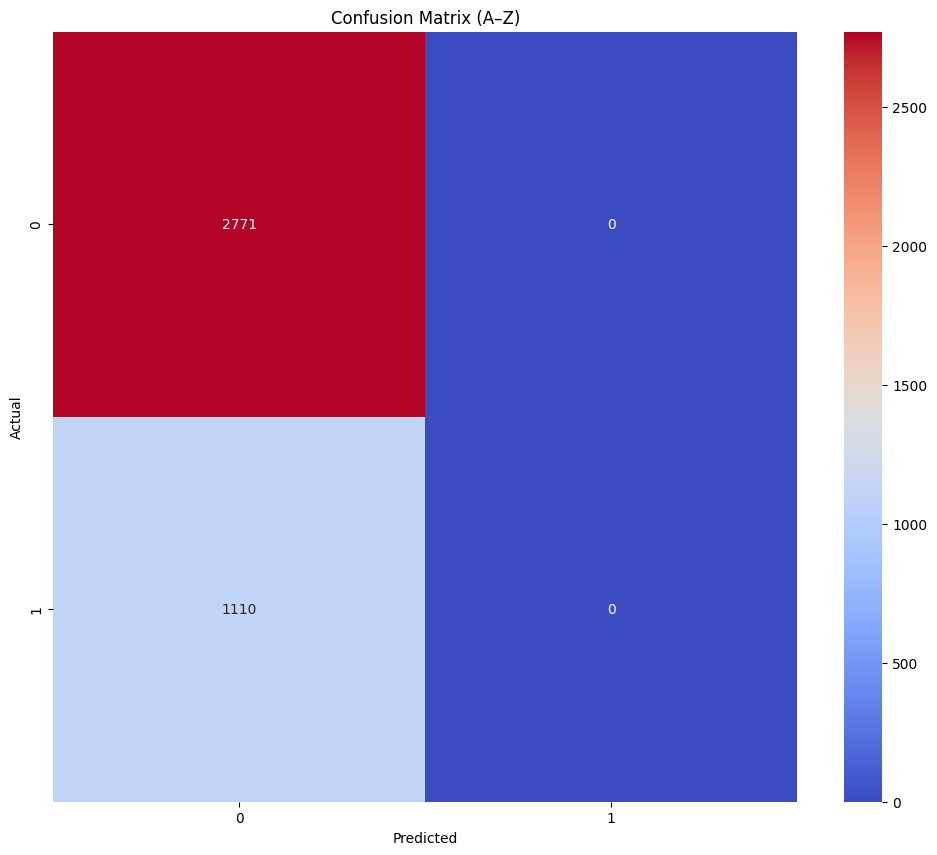

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix (A–Z)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [12]:
print("Classification Report:")
print(classification_report(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      2771
           1       0.00      0.00      0.00      1110

    accuracy                           0.71      3881
   macro avg       0.36      0.50      0.42      3881
weighted avg       0.51      0.71      0.59      3881



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


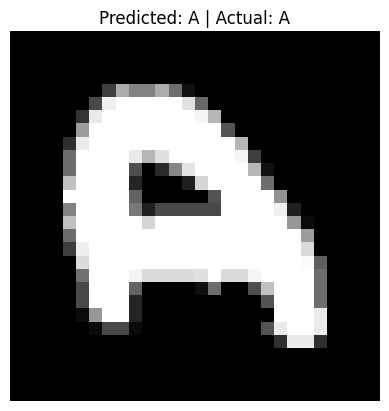

In [13]:
def int_to_char(i): return chr(i + ord('A'))

idx = 100
plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {int_to_char(y_pred[idx])} | Actual: {int_to_char(y_true[idx])}")
plt.axis('off')
plt.show()